[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



RELIANCE ANALYSIS

 Last 10 Days:
      Date       Close       RSI       20DMA       50DMA Buy_Signal
           RELIANCE.NS                                             
2025-06-16 1437.800049 56.156886 1428.530011 1370.673000      False
2025-06-17 1431.199951 57.325816 1428.860010 1374.273999      False
2025-06-18 1430.099976 55.078408 1428.905011 1377.902000      False
2025-06-19 1433.300049 55.115508 1430.100012 1382.474001      False
2025-06-20 1466.199951 67.869281 1432.070007 1388.484001      False
2025-06-23 1456.800049 67.319384 1433.170007 1393.976003      False
2025-06-24 1450.800049 60.029401 1434.605011 1399.285005      False
2025-06-25 1467.300049 59.311896 1437.325012 1404.252007      False
2025-06-26 1495.300049 66.127029 1441.200012 1409.356008      False
2025-06-27 1515.400024 68.985167 1445.925012 1414.878008      False

 Trade Summary:
Empty DataFrame
Columns: []
Index: []

 Total P&L: ₹Ticker
RELIANCE.NS    0.0
Name: 124, dtype: object
 Win Ratio: 0%
 ML Model Accu

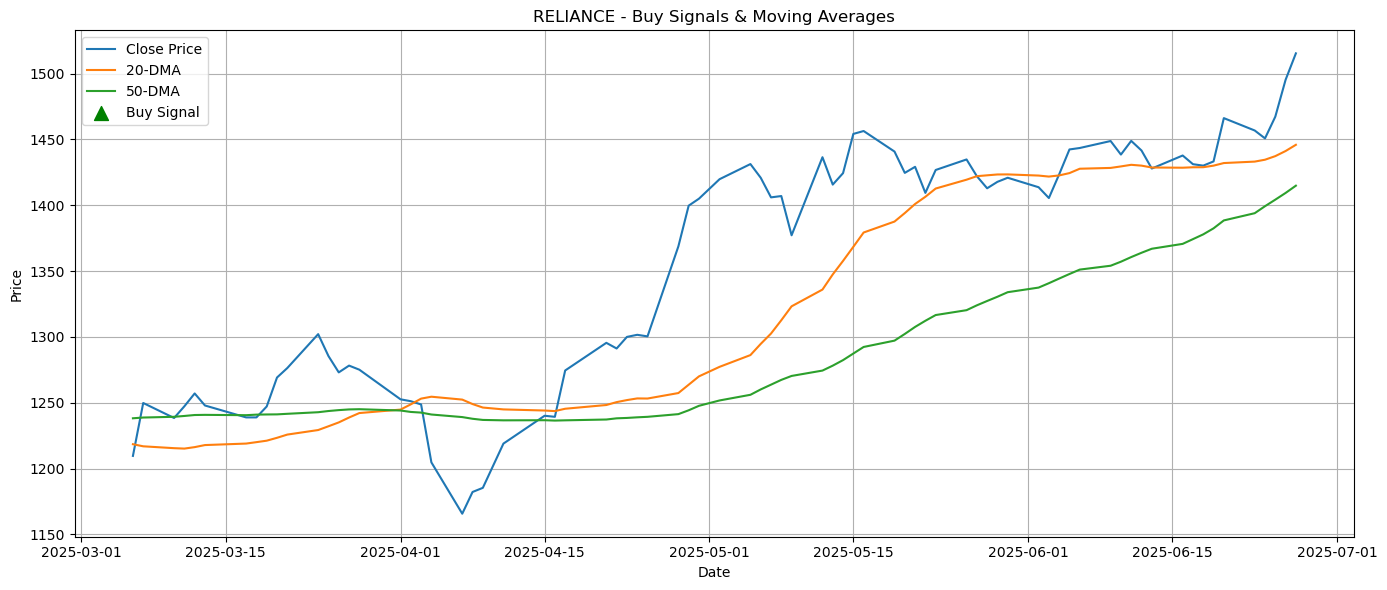

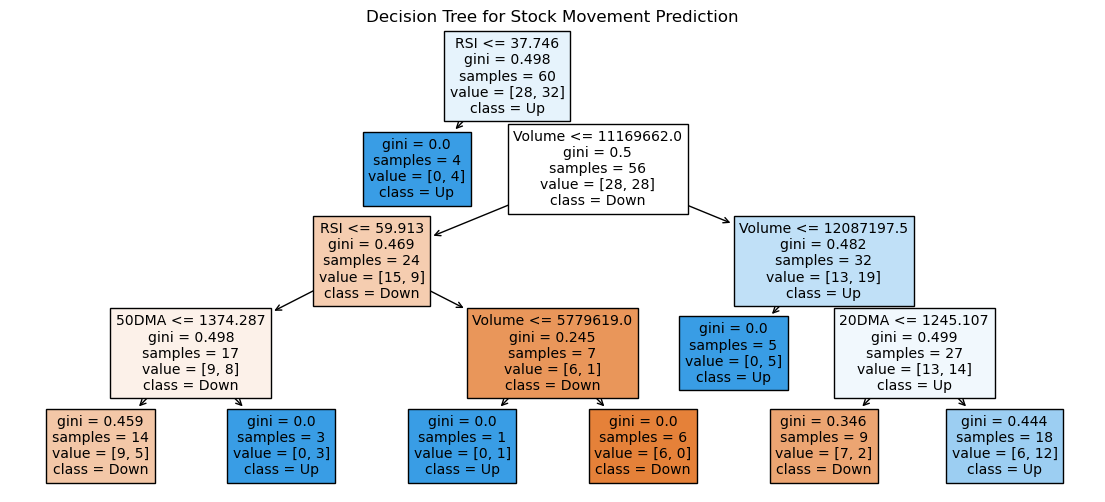


INFOSYS ANALYSIS

 Last 10 Days:
      Date       Close       RSI       20DMA       50DMA Buy_Signal
               INFY.NS                                             
2025-06-16 1623.800049 71.581335 1566.923920 1509.953081      False
2025-06-17 1639.900024 73.746578 1571.971582 1512.178245      False
2025-06-18 1632.900024 68.965536 1576.279724 1515.321521      False
2025-06-19 1618.400024 64.187492 1580.898297 1519.059351      False
2025-06-20 1622.900024 68.004160 1584.888867 1523.969946      False
2025-06-23 1584.000000 59.318182 1586.160333 1527.470435      False
2025-06-24 1581.599976 57.096175 1587.824579 1531.417959      False
2025-06-25 1614.900024 62.397702 1591.070007 1535.918079      False
2025-06-26 1616.000000 61.059312 1593.690009 1540.113792      False
2025-06-27 1608.000000 57.471258 1595.955011 1544.403923      False

 Trade Summary:
Empty DataFrame
Columns: []
Index: []

 Total P&L: ₹Ticker
INFY.NS    0.0
Name: 124, dtype: object
 Win Ratio: 0%
 ML Model Accuracy:

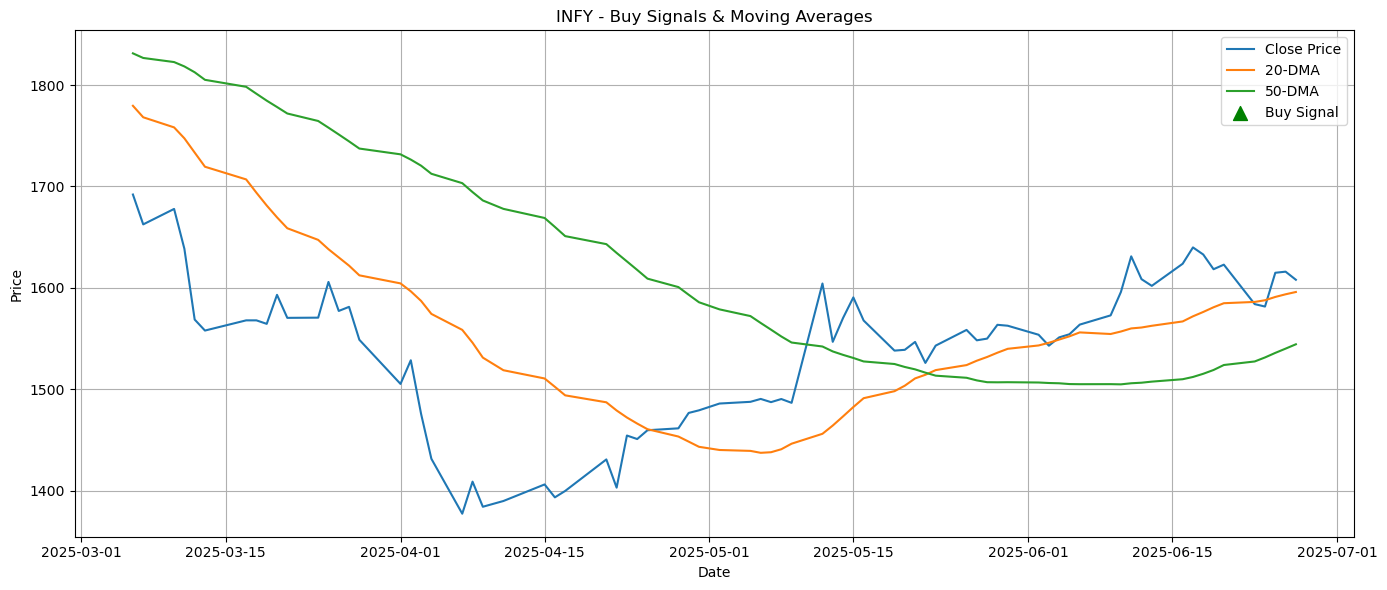

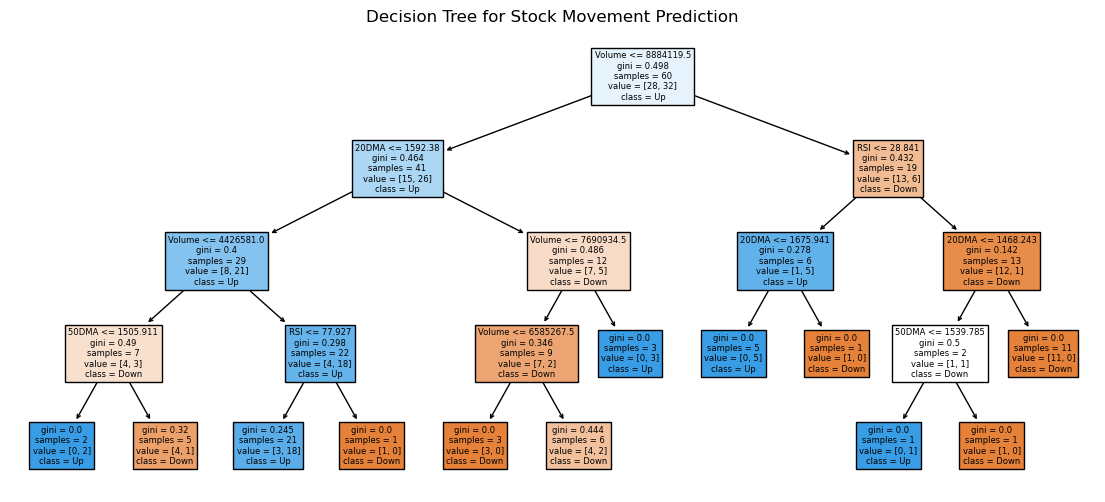


TCS ANALYSIS

 Last 10 Days:
      Date       Close       RSI       20DMA       50DMA Buy_Signal
                TCS.NS                                             
2025-06-16 3496.300049 54.590866 3444.849719 3407.986123      False
2025-06-17 3515.300049 57.389846 3447.240723 3408.037573      False
2025-06-18 3451.399902 47.969498 3445.073840 3409.602212      False
2025-06-19 3424.000000 48.843073 3443.955469 3412.675571      False
2025-06-20 3435.699951 52.130844 3441.558655 3416.485459      False
2025-06-23 3393.600098 52.419802 3435.931848 3419.078682      False
2025-06-24 3390.399902 51.257613 3432.058032 3422.526733      False
2025-06-25 3444.800049 58.726017 3430.953784 3427.362129      False
2025-06-26 3441.800049 56.986908 3429.679700 3431.806465      False
2025-06-27 3441.100098 52.558660 3430.090344 3435.729312      False

 Trade Summary:
Empty DataFrame
Columns: []
Index: []

 Total P&L: ₹Ticker
TCS.NS    0.0
Name: 124, dtype: object
 Win Ratio: 0%
 ML Model Accuracy: 50.0

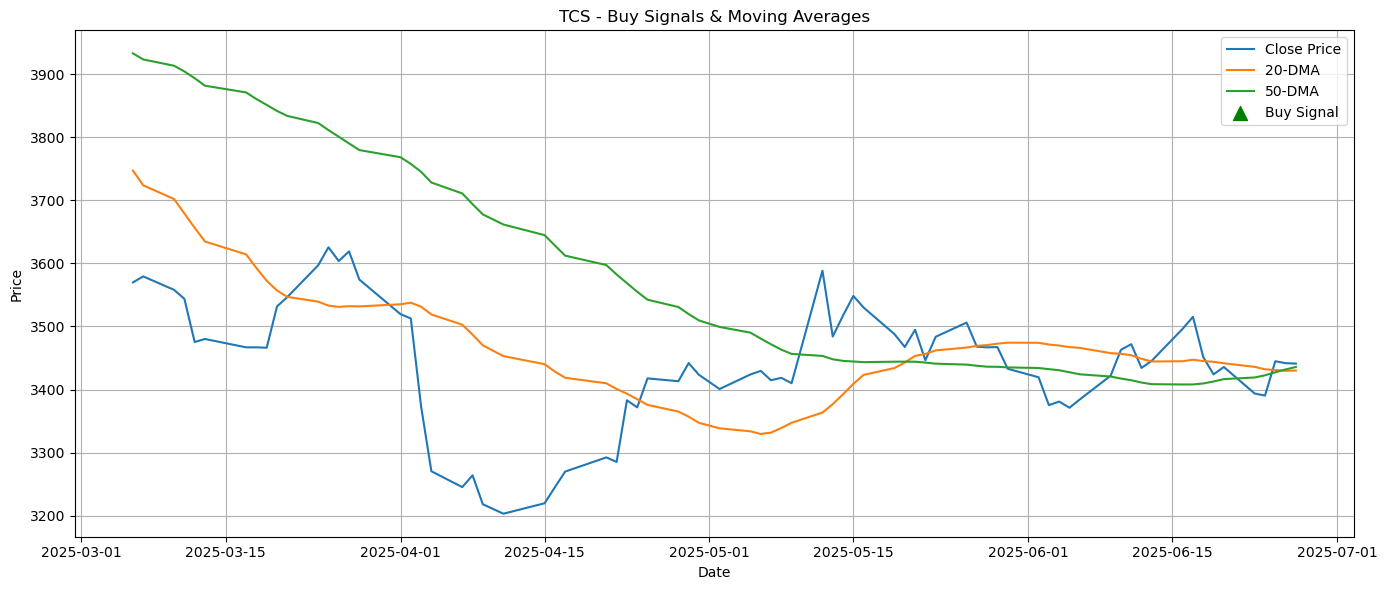

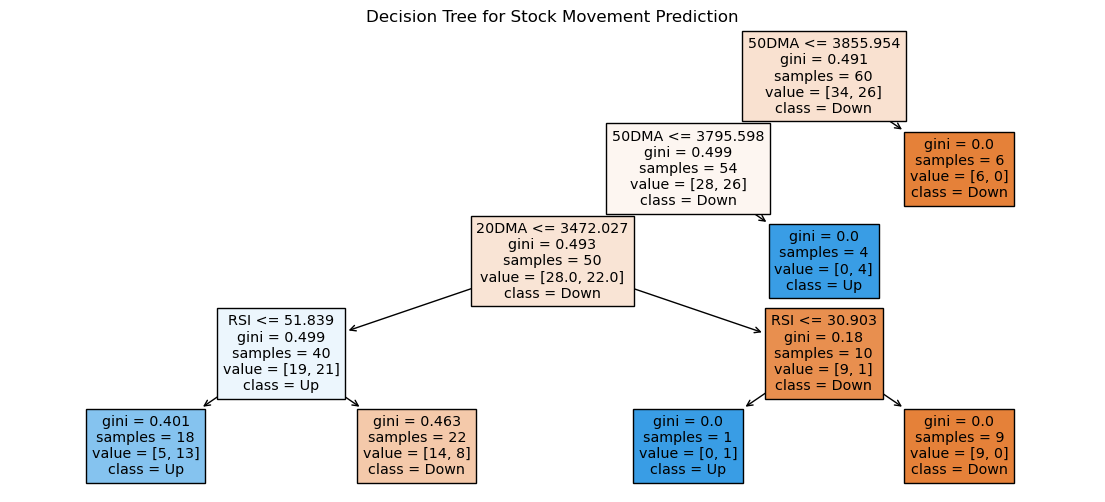

In [1]:
!pip install yfinance pandas numpy matplotlib scikit-learn gspread oauth2client



import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

def fetch_multiple_data(tickers=['RELIANCE.NS', 'INFY.NS', 'TCS.NS'], period='6mo'):
    data = {}
    for ticker in tickers:
        df = yf.download(ticker, period=period)
        df.reset_index(inplace=True)
        data[ticker] = df
    return data

def calculate_indicators(df):
    df['20DMA'] = df['Close'].rolling(window=20).mean()
    df['50DMA'] = df['Close'].rolling(window=50).mean()

    df['Change'] = df['Close'].diff()
    df['Gain'] = np.where(df['Change'] > 0, df['Change'], 0)
    df['Loss'] = np.where(df['Change'] < 0, -df['Change'], 0)

    avg_gain = df['Gain'].rolling(window=14).mean()
    avg_loss = df['Loss'].rolling(window=14).mean()
    df['RS'] = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + df['RS']))

    df['Buy_Signal'] = (df['RSI'] < 30) & (df['20DMA'] > df['50DMA']) & (df['20DMA'].shift(1) <= df['50DMA'].shift(1))
    return df

def simulate_trades(df, initial_cash=100000):
    position = 0
    cash = initial_cash
    buy_price = 0
    trades = []

    for i in range(1, len(df)):
        if df['Buy_Signal'].iloc[i] and cash > 0:
            position = cash / df.loc[i, 'Close']
            buy_price = df.loc[i, 'Close']
            cash = 0
            trades.append({'Date': df.loc[i, 'Date'], 'Action': 'Buy', 'Price': buy_price})

        elif position > 0 and df.loc[i, 'RSI'] > 70:
            sell_price = df.loc[i, 'Close']
            cash = position * sell_price
            pnl = cash - (position * buy_price)
            trades.append({'Date': df.loc[i, 'Date'], 'Action': 'Sell', 'Price': sell_price, 'PnL': pnl})
            position = 0

    final_pnl = cash + (position * df.iloc[-1]['Close']) - initial_cash
    wins = [t['PnL'] for t in trades if t.get('PnL', 0) > 0]
    total_trades = len([t for t in trades if t['Action'] == 'Sell'])
    win_ratio = len(wins) / total_trades if total_trades > 0 else 0

    return trades, final_pnl, win_ratio

def train_ml_model(df):
    df = df.dropna()
    df['Future'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
    features = df[['RSI', '20DMA', '50DMA', 'Volume']]
    target = df['Future']

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(max_depth=4)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))

    return model, acc, df

def visualize(df, ticker):
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['20DMA'], label='20-DMA')
    plt.plot(df['Date'], df['50DMA'], label='50-DMA')
    plt.scatter(df[df['Buy_Signal']]['Date'], df[df['Buy_Signal']]['Close'], 
                marker='^', color='green', label='Buy Signal', s=100)
    plt.title(f'{ticker.split(".")[0]} - Buy Signals & Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(14, 6))
    plot_tree(model, feature_names=feature_names, class_names=['Down', 'Up'], filled=True)
    plt.title('Decision Tree for Stock Movement Prediction')
    plt.show()

def process_all_stocks():
    stock_map = {'RELIANCE': 'RELIANCE.NS', 'INFOSYS': 'INFY.NS', 'TCS': 'TCS.NS'}
    all_data = fetch_multiple_data(list(stock_map.values()))
    
    for name, ticker in stock_map.items():
        print(f"\n{'='*30}\n{name} ANALYSIS\n{'='*30}")
        df = all_data[ticker]
        df = calculate_indicators(df)
        trades, pnl, win_ratio = simulate_trades(df)
        model, acc, df = train_ml_model(df)

        print("\n Last 10 Days:")
        print(df[['Date', 'Close', 'RSI', '20DMA', '50DMA', 'Buy_Signal']].tail(10).to_string(index=False))

        print("\n Trade Summary:")
        print(pd.DataFrame(trades).tail(5).to_string(index=False))

        print(f"\n Total P&L: ₹{round(pnl, 2)}")
        print(f" Win Ratio: {round(win_ratio * 100, 2)}%")
        print(f" ML Model Accuracy: {round(acc * 100, 2)}%")

        visualize(df, ticker)
        plot_decision_tree(model, ['RSI', '20DMA', '50DMA', 'Volume'])

process_all_stocks()